In [ ]:
!pip install pyod

In [26]:
import pandas as pd
from pyod.models.iforest import IForest
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report,accuracy_score

In [11]:
credit_data = pd.read_csv("/content/creditcard.csv" , on_bad_lines='skip')

<ipython-input-11-9fcf1ac25302>:1: DtypeWarning: Columns (5,14) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_data = pd.read_csv("/content/creditcard.csv" , on_bad_lines='skip')


In [ ]:
credit_data.head()

In [ ]:
# dataset info
credit_data.info()

In [ ]:
# Check for null values
credit_data.isnull().sum()

In [15]:
# drop rows having null values
credit_data = credit_data.dropna(axis=0)

Text(0, 0.5, 'Frequency')

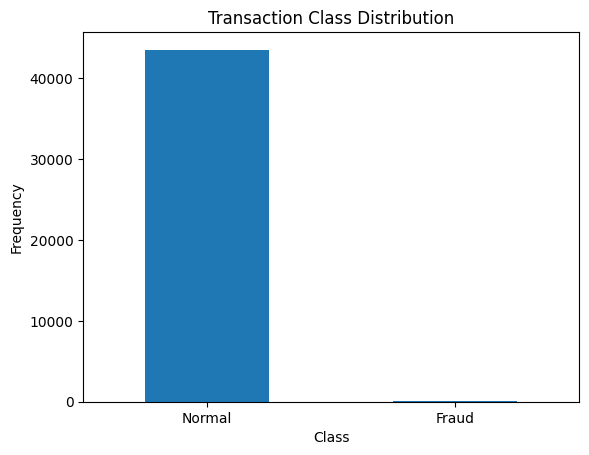

In [16]:
count_class = pd.value_counts(credit_data['Class'], sort = True)
count_class.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Frequency")

In [17]:
# Get the Fraud and the normal dataset 
fraud = credit_data[credit_data['Class']==1]
normal = credit_data[credit_data['Class']==0]

In [18]:
print(fraud.shape, normal.shape)

(145, 31) (43501, 31)


In [19]:
outliers_fraction = float(len(fraud)/len(normal))
print(outliers_fraction)

0.0033332567067423735


In [21]:
Fraud = credit_data[credit_data['Class']==1]
Valid = credit_data[credit_data['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [23]:
#Create independent and Dependent Features
columns = credit_data.columns.tolist()

# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)

X = credit_data[columns]
Y = credit_data[target]

X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(43646, 30)
(43646,)


In [25]:
if_clf = IForest(contamination=outliers_fraction,random_state=42, n_estimators=100, max_samples=128)

In [27]:
if_clf.fit(X)
scores_prediction = if_clf.decision_function(X)
y_pred = if_clf.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [30]:
import warnings
warnings.filterwarnings('always')

In [31]:
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
# Run Classification Metrics
print("{}: {}".format("Isolation Forest",n_errors))
print("Accuracy Score :")
print(accuracy_score(Y,y_pred))
print("Classification Report :")
print(classification_report(Y,y_pred))

Isolation Forest: 145
Accuracy Score :
0.9966778169820831
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     43501
         1.0       0.00      0.00      0.00       145

    accuracy                           1.00     43646
   macro avg       0.50      0.50      0.50     43646
weighted avg       0.99      1.00      1.00     43646



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python